## 0. Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import plotly.express as px
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
import sklearn

In [22]:
#loading data

df = pd.read_csv('/Users/abhishek/Downloads/train.csv')

In [2]:
df = pd.read_csv("C:/Users/Berti/Downloads/playground-series-s3e11/train.csv")

## 1. Understanding data


In [23]:
df.shape

(360336, 17)

In [27]:
df.dtypes

id                              int64
store_sales(in millions)      float64
unit_sales(in millions)         int64
total_children                  int64
num_children_at_home            int64
avg_cars_at home(approx).1      int64
gross_weight                  float64
recyclable_package              int64
low_fat                         int64
units_per_case                  int64
store_sqft                      int64
coffee_bar                      int64
video_store                     int64
salad_bar                       int64
prepared_food                   int64
florist                         int64
cost                          float64
dtype: object

In [29]:
df.describe()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
count,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000,360336.000000
mean,180167.500000,6.337376,3.043881,2.456482,0.689390,2.203813,13.822071,0.568086,0.327797,18.972706,28180.333442,0.564839,0.277394,0.504807,0.504832,0.503191,99.614729
std,104020.187637,3.307980,0.784676,1.488992,1.214732,1.084293,4.614792,0.495343,0.469411,10.212912,5968.874074,0.495779,0.447713,0.499978,0.499977,0.499991,29.939435
min,0.000000,0.510000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,20319.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.790000
25%,90083.750000,3.720000,3.000000,1.000000,0.000000,1.000000,9.710000,0.000000,0.000000,10.000000,23593.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.320000
50%,180167.500000,5.780000,3.000000,2.000000,0.000000,2.000000,13.600000,1.000000,0.000000,20.000000,27694.000000,1.000000,0.000000,1.000000,1.000000,1.000000,98.810000
75%,270251.250000,8.400000,4.000000,4.000000,1.000000,3.000000,17.700000,1.000000,1.000000,28.000000,33858.000000,1.000000,1.000000,1.000000,1.000000,1.000000,126.620000
max,360335.000000,22.920000,6.000000,5.000000,5.000000,4.000000,21.900000,1.000000,1.000000,36.000000,39696.000000,1.000000,1.000000,1.000000,1.000000,1.000000,149.750000


## 2. Tidying Up Data

In [30]:
df.head()

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost
0,0,8.61,3,2,2,2,10.30,1,0,32,36509,0,0,0,0,0,62.09
1,1,5.00,2,4,0,3,6.66,1,0,1,28206,1,0,0,0,0,121.80
2,2,14.08,4,0,0,3,21.30,1,0,26,21215,1,0,0,0,0,83.51
3,3,4.02,3,5,0,0,14.80,0,1,36,21215,1,0,0,0,0,66.78
4,4,2.13,3,5,0,3,17.00,1,1,20,27694,1,1,1,1,1,111.51


In [3]:
#Renaming columns (if necessary? if it is the same as test set? )
df = df.rename(columns= {'id':'ID',
                    'store_sales(in millions)':'Store_Sales(millions)',
                   'unit_sales(in millions)': 'Unit_Sales(millions)',
                   'total_children':'Total_Children',
                   'num_children_at_home':'Num_Children_At_Home',
                   'avg_cars_at home(approx).1':'Avg_Cars_At_Home',
                   'gross_weight':'Gross_Weight',
                   'recyclable_package':'Recyclable_Package',
                   'low_fat':'Low_Fat',
                   'units_per_case':'Units_Per_Case',
                   'store_sqft':'Store_sqft',
                   'coffee_bar':'Coffee_Bar',
                   'video_store':'Video_Store',
                   'salad_bar':'Salad_Bar',
                   'prepared_food':'Prepared_Food',
                   'florist':'Florist',
                   'cost':'Cost'})

In [5]:
#Checking missing values

df.isna().sum()

#no missing values

ID                       0
Store_Sales(millions)    0
Unit_Sales(millions)     0
Total_Children           0
Num_Children_At_Home     0
Avg_Cars_At_Home         0
Gross_Weight             0
Recyclable_Package       0
Low_Fat                  0
Units_Per_Case           0
Store_sqft               0
Coffee_Bar               0
Video_Store              0
Salad_Bar                0
Prepared_Food            0
Florist                  0
Cost                     0
dtype: int64

In [37]:
# # Looking for duplicated data

# df.loc[df.duplicated()]

,id,store_sales(in millions),unit_sales(in millions),total_children,num_children_at_home,avg_cars_at home(approx).1,gross_weight,recyclable_package,low_fat,units_per_case,store_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,cost


In [48]:
# df.loc[df.duplicated(subset=['Cost'])]

,ID,Store_Sales(millions),Unit_Sales(millions),Total_Children,Num_Children_At_Home,Avg_Cars_At_Home,Gross_Weight,Recyclable_Package,Low_Fat,Units_Per_Case,Store_sqft,Coffee_Bar,Video_Store,Salad_Bar,Prepared_Food,Florist,Cost
18,18,5.04,4,3,0,1,10.4,0,0,23,20319,0,0,0,0,0,126.24
19,19,13.32,4,2,1,2,18.5,0,0,24,27694,1,1,1,1,1,80.29
28,28,2.17,1,3,0,3,15.6,0,1,21,28206,1,0,0,0,0,121.80
30,30,1.83,3,2,0,3,11.3,0,1,33,23688,1,1,1,1,1,68.84
32,32,1.90,2,0,0,2,13.8,1,0,6,20319,0,0,0,0,0,126.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360331,360331,7.60,4,5,5,3,13.5,1,0,33,30268,0,0,0,0,0,133.42
360332,360332,14.44,4,4,0,4,18.8,1,1,18,20319,0,0,0,0,0,81.85
360333,360333,10.74,3,0,0,2,11.3,1,0,35,30584,1,1,1,1,1,87.07
360334,360334,11.04,3,1,0,3,10.2,0,1,14,30584,1,1,1,1,1,146.72


In [67]:
# cost_uq= pd.DataFrame({'cost': df.Cost.unique()})
# cost_uq.count()


cost    328
dtype: int64

In [69]:
# store_uq= pd.DataFrame({'store': df.Store_sqft.unique()})
# store_uq.count()

store    20
dtype: int64

In [70]:
# df.query('Store_sqft==20319 & Cost == 126.24')

,ID,Store_Sales(millions),Unit_Sales(millions),Total_Children,Num_Children_At_Home,Avg_Cars_At_Home,Gross_Weight,Recyclable_Package,Low_Fat,Units_Per_Case,Store_sqft,Coffee_Bar,Video_Store,Salad_Bar,Prepared_Food,Florist,Cost
12,12,7.35,3,1,0,2,8.11,0,0,9,20319,0,0,0,0,0,126.24
18,18,5.04,4,3,0,1,10.40,0,0,23,20319,0,0,0,0,0,126.24
32,32,1.90,2,0,0,2,13.80,1,0,6,20319,0,0,0,0,0,126.24
161,161,3.48,3,2,0,2,13.90,1,1,30,20319,0,0,0,0,0,126.24
226,226,1.95,3,3,0,3,16.00,1,0,11,20319,0,0,0,0,0,126.24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360012,360012,1.62,3,1,0,2,13.70,1,0,28,20319,0,0,0,0,0,126.24
360048,360048,5.96,4,2,0,4,13.10,0,0,9,20319,0,0,0,0,0,126.24
360188,360188,2.91,3,0,0,2,13.20,0,0,25,20319,0,0,0,0,0,126.24
360219,360219,5.22,3,2,0,1,10.80,1,0,28,20319,0,0,0,0,0,126.24


In [74]:
# See duplicates in ID. Results show no duplicates

df.loc[df.duplicated(subset=['ID'])]

,ID,Store_Sales(millions),Unit_Sales(millions),Total_Children,Num_Children_At_Home,Avg_Cars_At_Home,Gross_Weight,Recyclable_Package,Low_Fat,Units_Per_Case,Store_sqft,Coffee_Bar,Video_Store,Salad_Bar,Prepared_Food,Florist,Cost


## 3. Outliers

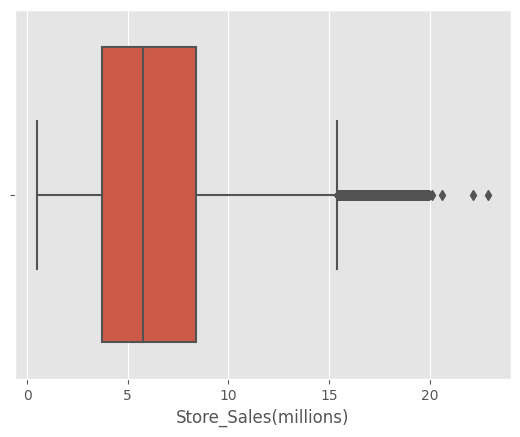

In [6]:
sns.boxplot(x=df["Store_Sales(millions)"]);

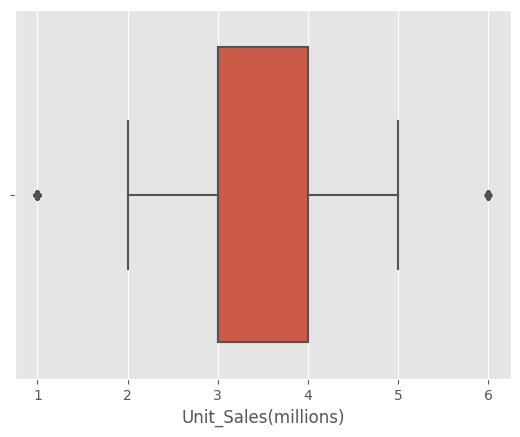

In [7]:
sns.boxplot(x=df["Unit_Sales(millions)"]);

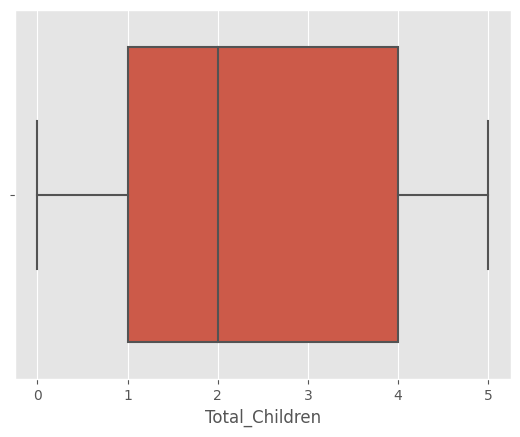

In [8]:
sns.boxplot(x=df["Total_Children"]);

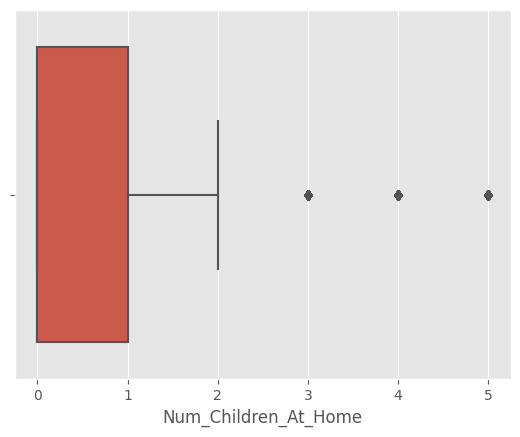

In [9]:
sns.boxplot(x=df["Num_Children_At_Home"]);

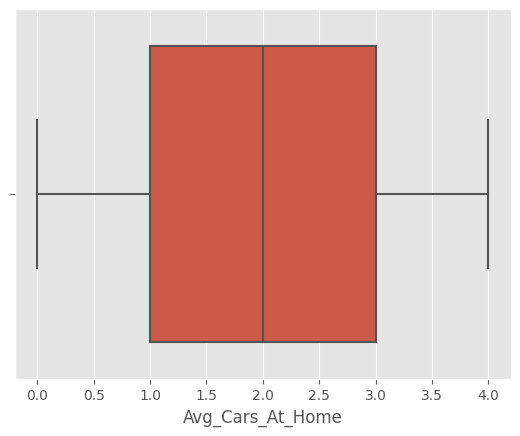

In [10]:
sns.boxplot(x=df["Avg_Cars_At_Home"]);

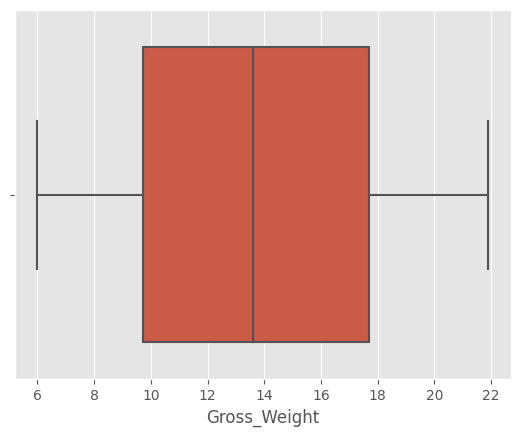

In [11]:
sns.boxplot(x=df["Gross_Weight"]);

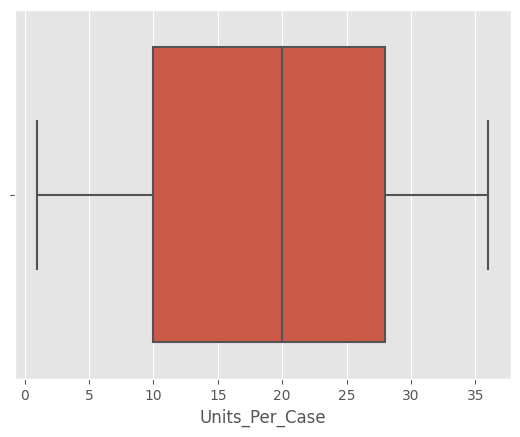

In [12]:
sns.boxplot(x=df["Units_Per_Case"]);

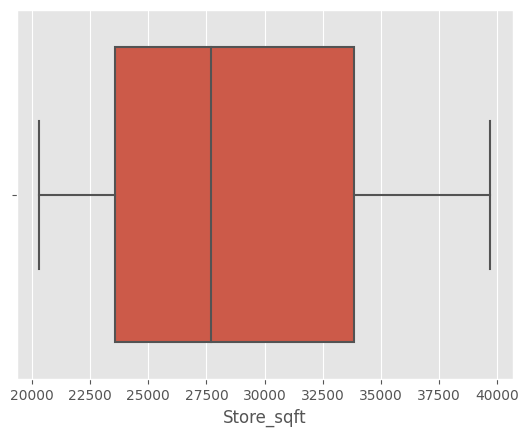

In [13]:
sns.boxplot(x=df["Store_sqft"]);

In [ ]:
# Box plots plotted for all variables. Only three columns seems to have outliers: Store_Sales(millions), Unit_Sales(millions), Num_Children_At_Home

In [ ]:
#Too much outliers(skewed?) in Store sales: Might need skew reducing transformations

In [4]:
outlier_feat, y = df[["Store_Sales(millions)","Unit_Sales(millions)", "Num_Children_At_Home"]], df.iloc[:,-1]

In [6]:
# only check the above features with outliers and y 
outlier_feat, y = df[["Store_Sales(millions)","Unit_Sales(millions)", "Num_Children_At_Home"]], df.iloc[:,-1]

## check outliers in IQR method first:
### test scripts:
for i in range(3):
    Q1 = np.percentile(outlier_feat.iloc[:,i],0.25, axis=0)
    Q3 = np.percentile(outlier_feat.iloc[:,i], 0.75, axis=0)
    IQR = Q3 - Q1
    lower_b = Q1 - 1.5*IQR
    upper_b = Q3 + 1.5*IQR
    num_lower_out = len(outlier_feat[outlier_feat.iloc[:,i]  <lower_b])
    num_upper_out = len(outlier_feat[outlier_feat.iloc[:,i] > upper_b])
    print("current column:{}, the length of lower bound outliers: {}, the length of upper bound outliers: {}".format(outlier_feat.columns[i],
                                                                                                                     num_lower_out, num_upper_out))

current column:Store_Sales(millions), the length of lower bound outliers: 341, the length of upper bound outliers: 353622
current column:Unit_Sales(millions), the length of lower bound outliers: 0, the length of upper bound outliers: 353571
current column:Num_Children_At_Home, the length of lower bound outliers: 0, the length of upper bound outliers: 116781


In [9]:
## test scripts 2: set maximum IQR as 3:
for i in range(3):
    Q1 = np.percentile(outlier_feat.iloc[:,i],0.25, axis=0)
    Q3 = np.percentile(outlier_feat.iloc[:,i], 0.75, axis=0)
    IQR = Q3 - Q1
    lower_b = Q1 - 5*IQR
    upper_b = Q3 + 5*IQR
    num_lower_out = len(outlier_feat[outlier_feat.iloc[:,i]  <lower_b])
    num_upper_out = len(outlier_feat[outlier_feat.iloc[:,i] > upper_b])
    print("current column:{}, the length of lower bound outliers: {}, the length of upper bound outliers: {}".format(outlier_feat.columns[i],
                                                                                                                     num_lower_out, num_upper_out))

current column:Store_Sales(millions), the length of lower bound outliers: 0, the length of upper bound outliers: 335561
current column:Unit_Sales(millions), the length of lower bound outliers: 0, the length of upper bound outliers: 353571
current column:Num_Children_At_Home, the length of lower bound outliers: 0, the length of upper bound outliers: 116781


In [15]:
## check outliers in 95% Confident Interval 
from scipy import stats

for i in range(3):
    z_score = np.abs(stats.zscore(outlier_feat.iloc[:,i], axis=0))
    threshold = stats.norm.ppf(0.975)
    outliers = outlier_feat[z_score > threshold]
    
    print("Current column", outlier_feat.columns[i], "number of outliers", len(outliers))

Current column Store_Sales(millions) number of outliers 14917
Current column Unit_Sales(millions) number of outliers 12541
Current column Num_Children_At_Home number of outliers 18809


In [10]:
## check outliers for more robust outlier detection algorithms (very slow)
from sklearn.svm import OneClassSVM
from sklearn.ensemble import IsolationForest

oneclass_model = OneClassSVM(kernel='rbf', nu=0.05)
ensemble_model = IsolationForest(contamination='auto')

out1 = oneclass_model.fit_predict(outlier_feat)
out2 = ensemble_model.fit_predict(outlier_feat)


In [11]:
final_out1 = len(np.where(out1==-1)[0])
final_out2 = len(np.where(out2==-1)[0])
final_out1, final_out2

(18138, 110635)

In [5]:
from sklearn.covariance import EllipticEnvelope

ellict_model = EllipticEnvelope(contamination=0.1)

out3 = ellict_model.fit_predict(outlier_feat)
final_out3 = len(np.where(out3==-1)[0])
final_out3

36009

In [16]:
18000/360000

0.05

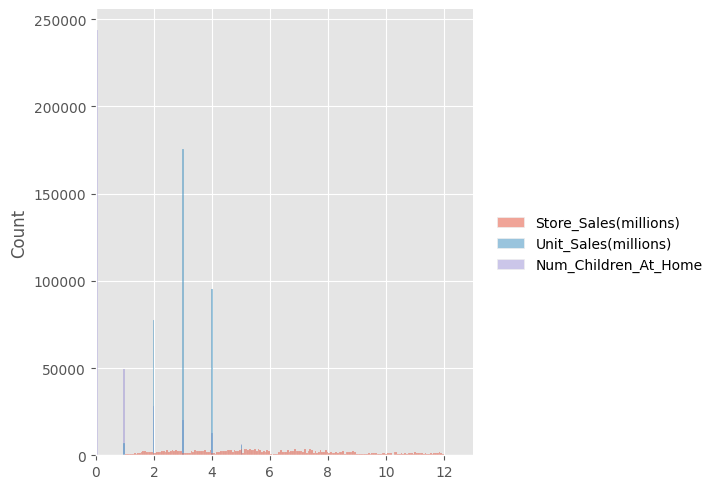

In [17]:
# check the distributions of the data
sns.displot(outlier_feat)
plt.xlim(0,13);

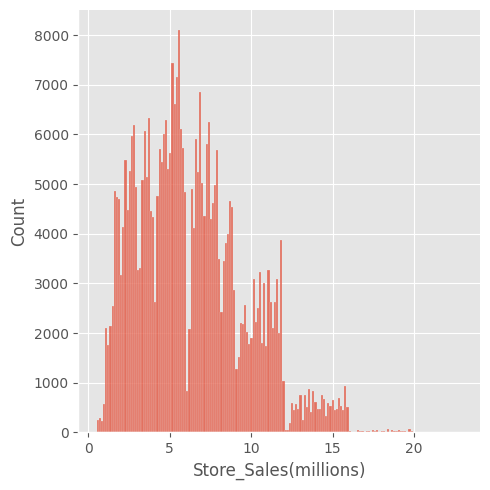

In [18]:
sns.displot(outlier_feat.iloc[:,0]);

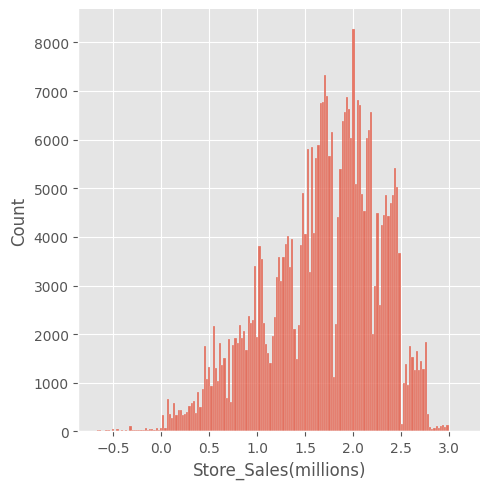

In [24]:
sns.displot(np.log(outlier_feat.iloc[:,0]));

C:\Users\Berti\AppData\Local\Temp\ipykernel_5872\2304772170.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(outlier_feat.iloc[:,1]);


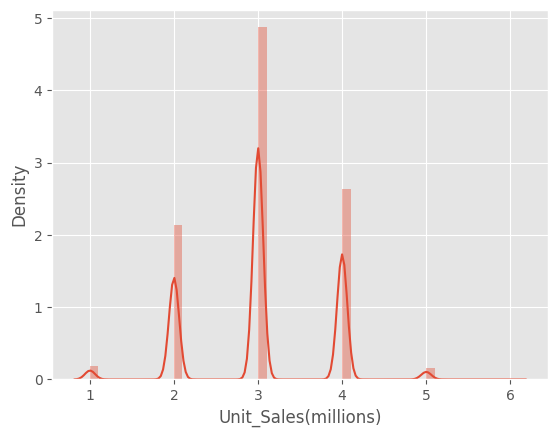

In [20]:
sns.distplot(outlier_feat.iloc[:,1]);

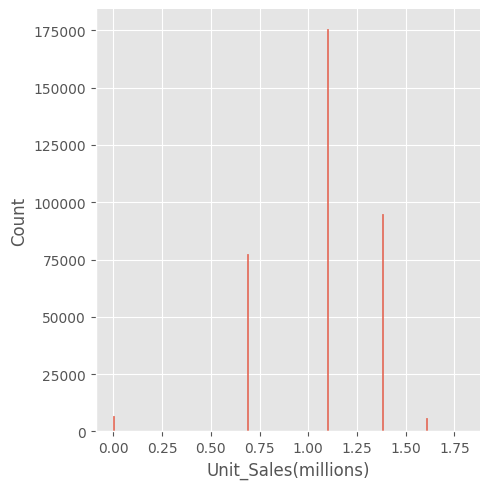

In [25]:
sns.displot(np.log(outlier_feat.iloc[:,1]));

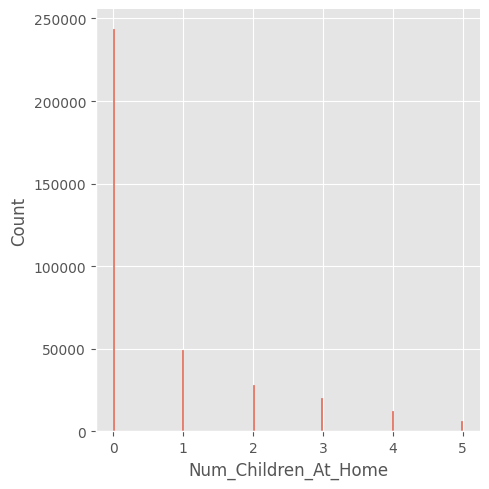

In [21]:
sns.displot(outlier_feat.iloc[:,2]);

C:\Users\Berti\miniconda3\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


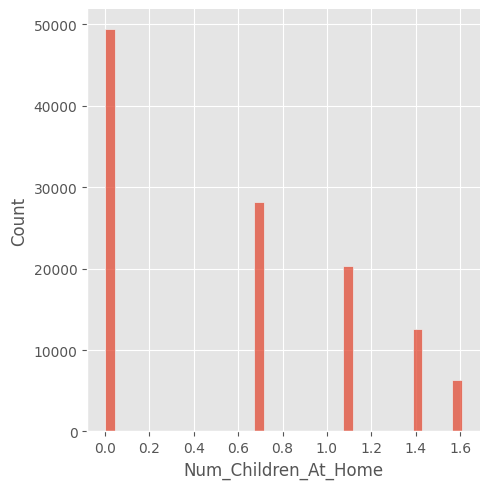

In [26]:
sns.displot(np.log(outlier_feat.iloc[:,2]));

In [22]:
# check the skewness 
from scipy import stats
skew = stats.skew(outlier_feat)
skew

array([ 0.66148894, -0.1079979 ,  1.84867302])

In [23]:
logx = np.log(outlier_feat)
log_skew = stats.skew(outlier_feat)
log_skew

C:\Users\Berti\miniconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: divide by zero encountered in log
  result = func(self.values, **kwargs)


array([ 0.66148894, -0.1079979 ,  1.84867302])

In [28]:
# save no outlier dataset version for later experiment with one class svm algorithm 
df1 = df.drop(np.where(out1 == -1)[0])
df1.to_csv("train_no_outliers.csv", index=False)

# 4. Feature Engineering

## 4.1 Transform Data

In [42]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PowerTransformer, StandardScaler

# create transformation pipeline and apply for only skewness data based on the above results
pipline = Pipeline([('johnson', PowerTransformer(method='yeo-johnson')),
                    ('scaler', StandardScaler())])

# apply the transformation to the original dataset 
X_train = df.iloc[:,1:-1]
X_train_trans = pipline.fit_transform(X_train)

In [43]:
# apply the transformation to the removal outliers dataset
X_train1 = df1.iloc[:,1:-1]
X_train_trans1 = pipline.fit_transform(X_train1)

## 4.2 Dimensionality Reduction and Feature Selection 

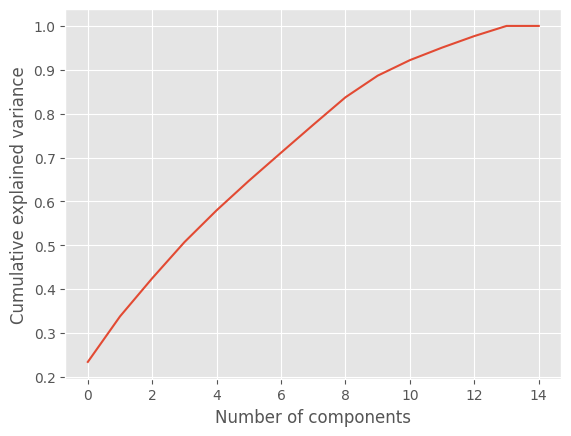

In [44]:
# dimensionality reduction check (indirectly feature selection)
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

## PCA check for original dataset 
### Instantiate the PCA class with n_components=None to get all possible components
pca = PCA(n_components=None)

### Fit the data to the PCA model
pca.fit(X_train_trans)

### Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
## PCA check for original dataset 
### Instantiate the PCA class with n_components=None to get all possible components
pca = PCA(n_components=9)

### Fit the data to the PCA model
X_features = pca.fit(X_train_trans)


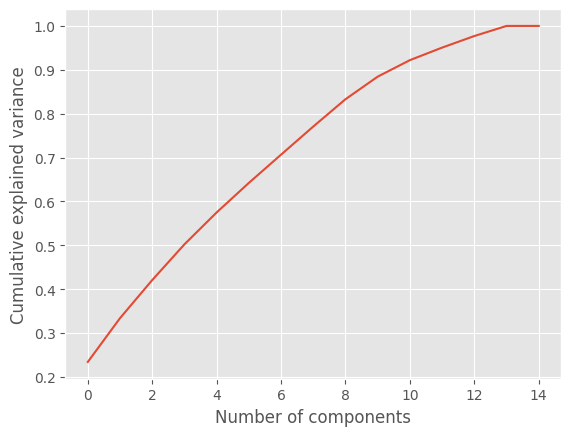

In [45]:
## PCA check for outlier removal dataset 
### Instantiate the PCA class with n_components=None to get all possible components
pca = PCA(n_components=None)

### Fit the data to the PCA model
pca.fit(X_train_trans1)

### Plot the explained variance ratio
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.show()

In [ ]:
## PCA check for outlier removal dataset 
### Instantiate the PCA class with n_components=None to get all possible components
pca = PCA(n_components=9)

### Fit the data to the PCA model
X_features1 = pca.fit(X_train_trans1)


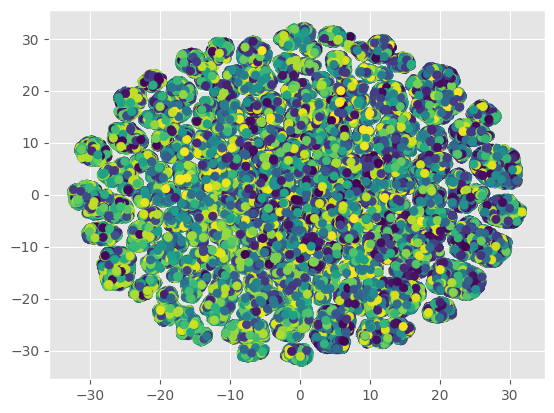

In [46]:
## t-distributed check for original dataset:
### Instantiate TSNE class with default value (usually use 2 or 3, but can applying tuning later)
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

### Fit the data to the TSNE model
X_tsne = tsne.fit_transform(X_train_trans)

### Plot the pattern
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y)
plt.show()

In [ ]:
## t-distributed check for outlier removal dataset:
### Instantiate TSNE class with default value
tsne = TSNE(n_components=2, perplexity=30, learning_rate=200, n_iter=1000, random_state=42)

### Fit the data to the TSNE model
X_tsne1 = tsne.fit_transform(X_train_trans1)

### Plot the pattern
plt.scatter(X_tsne1[:, 0], X_tsne1[:, 1], c=y)
plt.show()

In [57]:
# feature selection check:
from sklearn.ensemble import RandomForestRegressor

## overall feature importance for the original dataset
### Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train_trans, df.iloc[:,-1])

### Get the feature importances
importances = rf.feature_importances_
pd.DataFrame(importances.reshape(1,-1), columns=df.columns[1:-1])

,Store_Sales(millions),Unit_Sales(millions),Total_Children,Num_Children_At_Home,Avg_Cars_At_Home,Gross_Weight,Recyclable_Package,Low_Fat,Units_Per_Case,Store_sqft,Coffee_Bar,Video_Store,Salad_Bar,Prepared_Food,Florist
0,0.265308,0.049762,0.054745,0.038752,0.050247,0.236744,0.029127,0.027763,0.171525,0.052397,0.005614,0.002532,0.001638,0.002244,0.011601


In [58]:
## overall feature importance for the outlier removal dataset
### Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train_trans1, df1.iloc[:,-1])

### Get the feature importances
importances1 = rf.feature_importances_
pd.DataFrame(importances1.reshape(1,-1), columns=df1.columns[1:-1])

,Store_Sales(millions),Unit_Sales(millions),Total_Children,Num_Children_At_Home,Avg_Cars_At_Home,Gross_Weight,Recyclable_Package,Low_Fat,Units_Per_Case,Store_sqft,Coffee_Bar,Video_Store,Salad_Bar,Prepared_Food,Florist
0,0.264301,0.047524,0.05607,0.038198,0.049382,0.237784,0.029443,0.027906,0.172408,0.053715,0.005933,0.002671,0.001629,0.002664,0.010373


# 5 Modelling

In [ ]:
# apply the data transform to test data 